# Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

# Carregamento dos dataset de resultados

In [3]:
#usuario= "igorcapeletti"
usuario= "igorubuntu"

raiz= f"/home/{usuario}/github/tcc_eBPF_XDP/graficos"

#pasta de resultados gerais para programas eBPF: ----------------
#pasta_resultado_ebpf= 'resultados1'
#pasta_resultado_ebpf= 'resultados2'
pasta_resultado_ebpf= 'resultados3'
#pasta_resultado_ebpf= 'resultados4'
raiz_ebpf= f"/home/{usuario}/github/tcc_eBPF_XDP/experimentos/{pasta_resultado_ebpf}"


#pasta de resultados gerais para programas AF_XDP: ----------------
#pasta_resultado_af_xdp= 'resultados_af_xdp1'
pasta_resultado_af_xdp= 'resultados_af_xdp2'
raiz_af_xdp= f"/home/{usuario}/github/tcc_eBPF_XDP/experimentos/{pasta_resultado_af_xdp}"


#carregamento dos arquivos CSV dos resultados dos programas eBPF e AF_XDP: ----------------
df_sar_ebpf = pd.read_csv(f'{raiz_ebpf}/resultado_geral_sar.csv', sep=',', engine='python')
df_sar_af_xdp = pd.read_csv(f'{raiz_af_xdp}/resultado_geral_sar.csv', sep=',', engine='python')

#normalizacao dos dados af_xdp
df_sar_af_xdp['hook_ebpf']= df_sar_af_xdp['hook_ebpf'].replace('xdpgeneric','af_xdp')

#concatenação dos dataframes referentes a cada analise (ebpf+af_xdp)
df_sar= pd.concat([df_sar_ebpf,df_sar_af_xdp], sort = False)

In [4]:
lista_combined= [1,2,4,8]

lista_for= ['for_0_a_0','for_0_a_1','for_0_a_100','for_0_a_200','for_0_a_400','for_0_a_800','for_0_a_1600','for_0_a_3200','for_0_a_6400','for_0_a_12800']
lista_alias_for= ['0','1','100','200','400','800','1600','3200','6400','12800']

lista_hook_xdp= ['xdpgeneric','xdpdvr','af_xdp']

lista_pacotes= [64,128,256,512,1024,1500]
lista_alias_pacotes= ['64B','128B','256B','512B','1024B','1500B']

lista_tipo_programa= ['ebpf','af_xdp']

# Normalização dos datasets

In [6]:
#antes de executar isso, eliminar ultima coluna dos arquivos perf que estão em branco

colunas= ['combined', 'algoritmo', 'packet_size', 'hook_ebpf', 'cpu', 'soft']
df_sar= df_sar[colunas]

df_sar['algoritmo']= df_sar['algoritmo'].astype(str)
for i,j in zip(lista_for,lista_alias_for):
       df_sar['algoritmo']= df_sar['algoritmo'].replace(f'{i}',f'{j}')

df_sar['algoritmo']= df_sar['algoritmo'].astype(int)


# Resultados para ***Uso de CPU***

In [7]:
format_imagens= '.pdf'

In [8]:
df_sar

,combined,algoritmo,packet_size,hook_ebpf,cpu,soft
0,4,800,128,xdpdrv,0,100.00
1,4,800,128,xdpdrv,1,100.00
2,4,800,128,xdpdrv,2,100.00
3,4,800,128,xdpdrv,3,100.00
4,4,800,128,xdpdrv,4,6.57
...,...,...,...,...,...,...
3835,4,200,64,af_xdp,11,0.00
3836,4,200,64,af_xdp,12,0.00
3837,4,200,64,af_xdp,13,0.00
3838,4,200,64,af_xdp,14,0.00


### uso1) Quantos processadores são utilizados por quantidade de filas TX/RX?

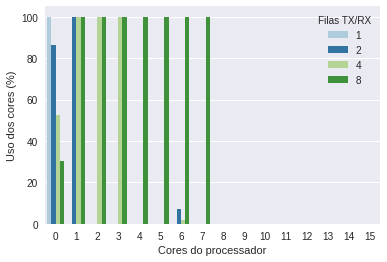

In [21]:
algoritmo= 0
combined= 8
packet_size= 1024
hook_ebpf= 'xdpgeneric'
#hook_ebpf= 'xdpdrv'
hook_ebpf= 'af_xdp'

eixo_x= 'cpu'
eixo_y= 'soft'
hue= 'combined'

plt.rc('figure', figsize=(15, 5))
df_sar= df_sar.sort_values(by=[eixo_x, hue], ascending=True)              #ordena dados por tamanho dos pacotes

df= df_sar.copy()
df= df[df.algoritmo == algoritmo]                #filtra por algoritmo especifico
#df= df[df.combined == combined]                  #filtra por quantidade de filas TX/RX especifica
df= df[df.packet_size == packet_size]            #filtra por tamanho de pacote especifico
df= df[df.hook_ebpf == hook_ebpf]                #filtra por modo XDP especifico

#df['packet_size']= df['packet_size'].astype(str)
#for i,j in zip(lista_pacotes,lista_alias_pacotes):
#       df['packet_size']= df['packet_size'].replace(f'{i}',f'{j}')
       
df= df[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired');                      #grafico de barras
#ax = sns.lineplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired', marker='o');        #grafico de linhas
ax.set_ylabel('Uso dos cores (%)')
ax.set_xlabel("Cores do processador")
ax.legend(title = 'Filas TX/RX')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/uso1{format_imagens}')


### uso2) Qual é o uso dos CPUs para cada modo XDP?

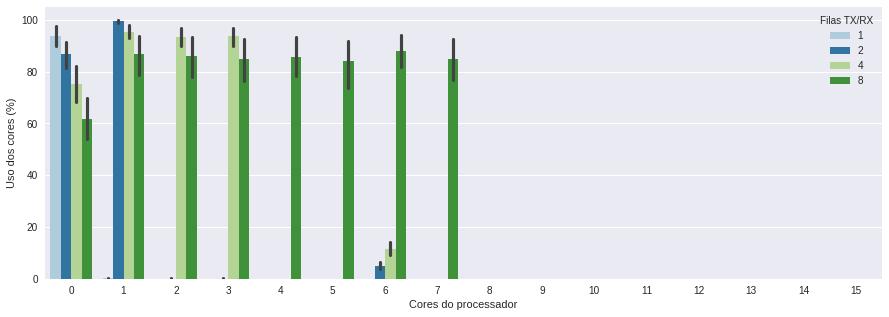

In [37]:
algoritmo= 400
combined= 8
packet_size= 64
hook_ebpf= 'xdpgeneric'
#hook_ebpf= 'xdpdrv'
#hook_ebpf= 'af_xdp'

eixo_x= 'cpu'
eixo_y= 'soft'
hue= 'combined'

plt.rc('figure', figsize=(15, 5))
df_sar= df_sar.sort_values(by=[eixo_x, hue], ascending=True)              #ordena dados por tamanho dos pacotes

df= df_sar.copy()
df= df[df.algoritmo == algoritmo]                #filtra por algoritmo especifico
df= df[df.combined == combined]                  #filtra por quantidade de filas TX/RX especifica
df= df[df.packet_size == packet_size]            #filtra por tamanho de pacote especifico
df= df[df.hook_ebpf == hook_ebpf]                #filtra por modo XDP especifico

df= df[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired');                      #grafico de barras
#ax = sns.lineplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired', marker='o');        #grafico de linhas
ax.set_ylabel('Uso dos cores (%)')
ax.set_xlabel("Cores do processador")
ax.legend(title = 'Filas TX/RX')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/uso2_hook_{hook_ebpf}{format_imagens}')

uso3) Qual uso de CPU para os diferentes laços de repetição?

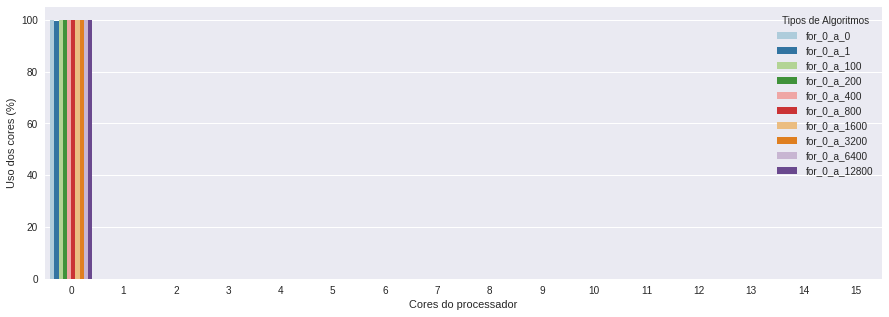

In [57]:
algoritmo= 100
combined= 1
packet_size= 64
hook_ebpf= 'xdpgeneric'
#hook_ebpf= 'xdpdrv'
#hook_ebpf= 'af_xdp'

eixo_x= 'cpu'
eixo_y= 'soft'
hue= 'algoritmo'

plt.rc('figure', figsize=(15, 5))
df_sar= df_sar.sort_values(by=[eixo_x, hue], ascending=True)              #ordena dados por tamanho dos pacotes

df= df_sar.copy()
#df= df[df.algoritmo == algoritmo]                #filtra por algoritmo especifico
df= df[df.combined == combined]                  #filtra por quantidade de filas TX/RX especifica
df= df[df.packet_size == packet_size]            #filtra por tamanho de pacote especifico
df= df[df.hook_ebpf == hook_ebpf]                #filtra por modo XDP especifico

df= df[[eixo_x, eixo_y, hue]]

df['algoritmo']= df['algoritmo'].astype(str)
for i,j in zip(lista_alias_for,lista_for):
       df['algoritmo']= df['algoritmo'].replace(f'{i}',f'{j}')

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired');                      #grafico de barras
#ax = sns.lineplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired', marker='o');        #grafico de linhas
ax.set_ylabel('Uso dos cores (%)')
ax.set_xlabel("Cores do processador")
ax.legend(title = 'Tipos de Algoritmos')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/uso3_hook_{hook_ebpf}{format_imagens}')


i3) Qual uso de CPU dos filas TX/RX para os diferentes laços de repetição? (todos os modos xdp e packets 1024)

In [ ]:
i2) Qual uso de CPU das filas TX/RX para os diferentes laços de repetição? (todos os modos xdp e packets 1024)

### 2.3 Qual o ***uso de CPU*** por modo de hook XDP?

## 3. Tamanho dos laços de repetição dos algoritmos

### 3.3 Qual o ***uso de CPU*** por laço de repetição

## 4. Tamanho dos Pacotes

### 4.3 Qual o ***uso de CPU*** obtido por tamanho de pacote 